## Feature extraction using HOG

### The Histogram of Oriented Gradient (HOG) feature descriptor is popular for object detection

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_hog.html#sphx-glr-auto-examples-features-detection-plot-hog-py

In [2]:
import matplotlib.pyplot as plt

In [3]:
import skimage
from skimage.feature import hog
from skimage import data, color, io, exposure

### Loading an image

In [4]:
man_img = skimage.io.imread('datasets/images/crossing.jpg')

https://www.pexels.com/photo/man-skateboarding-on-road-near-pedestrian-lane-2083867/

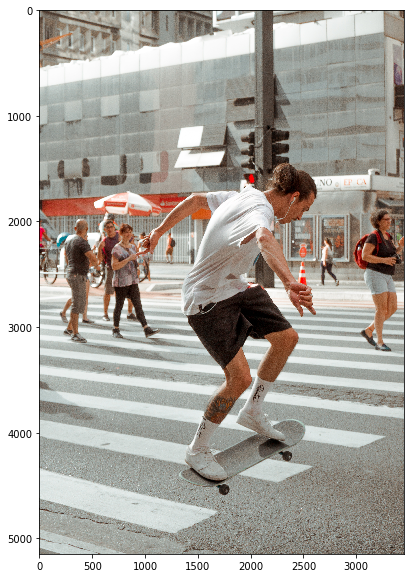

In [5]:
plt.figure(figsize=(12, 10))
plt.imshow(man_img, cmap='gray');

In [6]:
man_img.shape

(5147, 3453, 3)

In [7]:
from skimage.util import crop

In [8]:
cropped_img = crop(man_img, ((1500, 600), (700, 700), (0,0)), copy=False)

In [9]:
cropped_img.shape

(3047, 2053, 3)

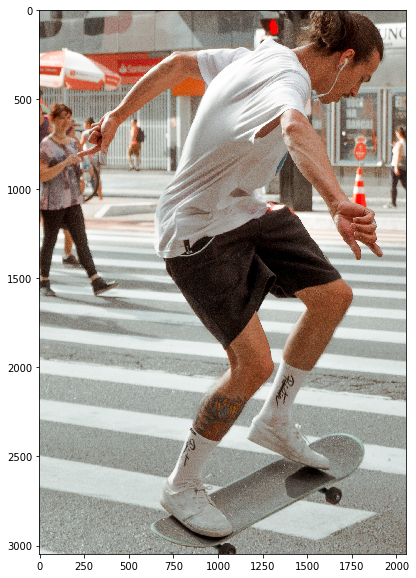

In [10]:
plt.figure(figsize=(12, 10))
plt.imshow(cropped_img, cmap='gray');

In [11]:
from skimage.transform import resize

In [12]:
resized_img = resize(cropped_img, (256, 256), mode='reflect', anti_aliasing=True)
resized_img.shape

(256, 256, 3)

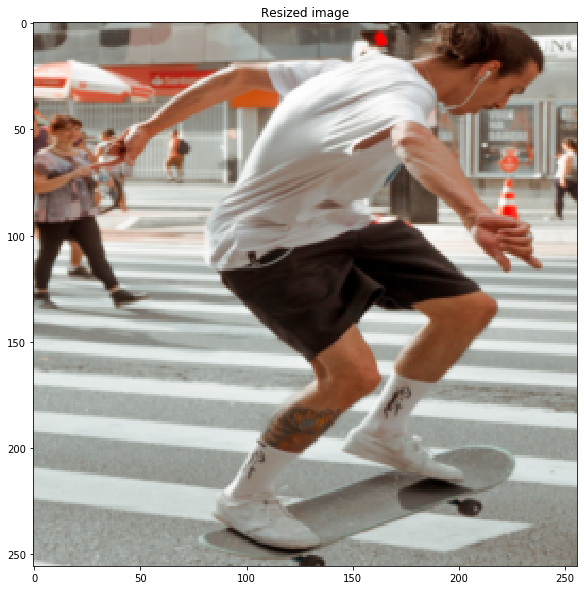

In [13]:
plt.figure(figsize=(12, 10)) 
plt.imshow(resized_img) 
plt.title('Resized image');

* Ploting the descriptors with <b> L2-Hys </b> normalization

## Calculate Histogram of  Oriented Gradients (HOG)

* create a cell of size(in pixel) = 16x16
* define number of cells in each block = 2
* block normalization method (default) is now L2-Hys
* visualize = True = returns an image of the HOG, which containes a line segment centered at cell center and has intensity proportional to the corresponding histogram value
* multichannel = True = last image dimension is considered as color channel. 

It returns HOG descriptor and a visualisation of the HOG image.

In [14]:
fd, hog_image = hog(resized_img, 
                    pixels_per_cell=(16, 16), 
                    block_norm='L2-Hys',
                    visualize=True, 
                    multichannel=True)

<b>Rescale HOG image's intensity by customizing min and max intensity values of an image</b>

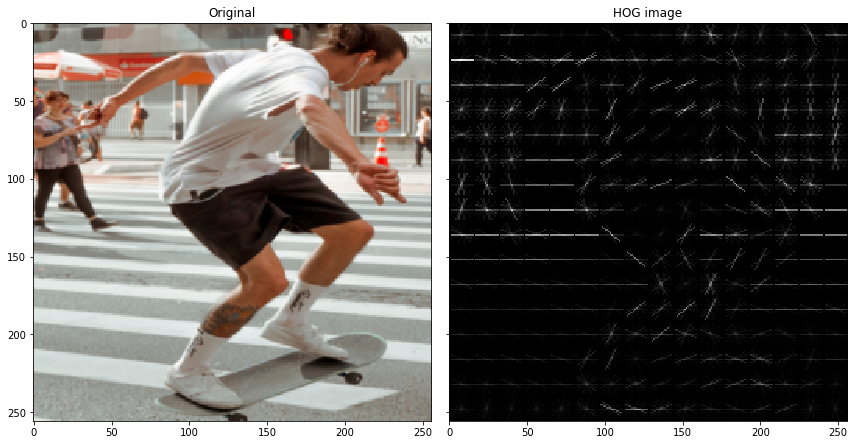

In [15]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(12, 10), 
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(resized_img, cmap='gray')
ax[0].set_title('Original')


hog_image_rescaled = exposure.rescale_intensity(hog_image, 
                                                in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap='gray')
ax[1].set_title('HOG image')

plt.tight_layout()
plt.show()

### Taking fewer pixels per cell
* Fewer the pixels per cell higher and smaller the descriptors

In [16]:
fd, hog_image = hog(resized_img, 
                    pixels_per_cell=(8, 8), 
                    block_norm='L2-Hys',
                    visualize=True, 
                    multichannel=True)

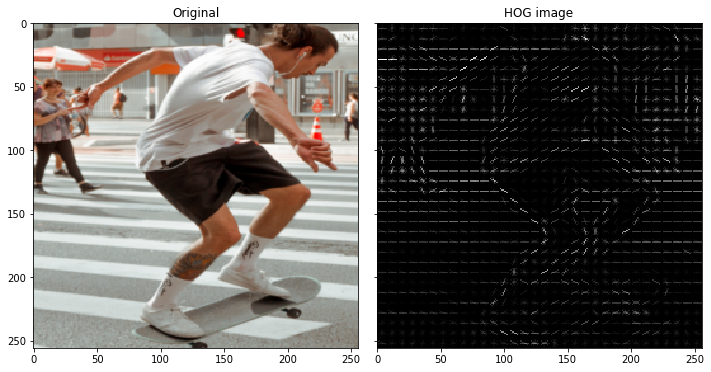

In [17]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(10, 7), 
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(resized_img, cmap='gray')
ax[0].set_title('Original')


hog_image_rescaled = exposure.rescale_intensity(hog_image, 
                                                in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap='gray')
ax[1].set_title('HOG image')

plt.tight_layout()
plt.show()

## Taking more pixels per cell
* Higher the pixels per cell lesser and bigger the descriptors are

In [18]:
fd, hog_image = hog(resized_img, 
                    pixels_per_cell=(32, 32), 
                    block_norm='L2-Hys',
                    visualize=True, 
                    multichannel=True)

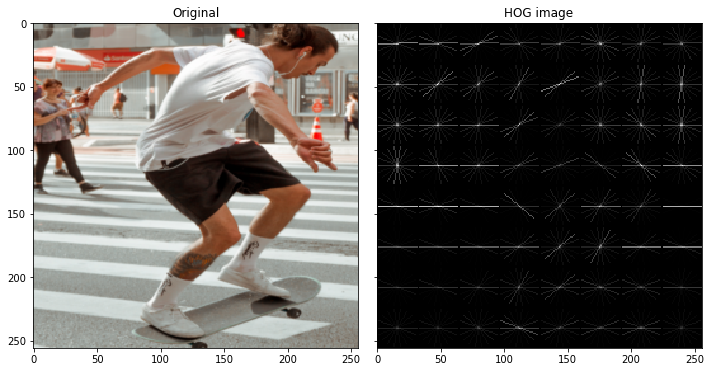

In [19]:
fig, axes = plt.subplots(1, 2, 
                         figsize=(10, 7), 
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(resized_img, cmap='gray')
ax[0].set_title('Original')

hog_image_rescaled = exposure.rescale_intensity(hog_image, 
                                                in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap='gray')
ax[1].set_title('HOG image')

plt.tight_layout()
plt.show()

In [20]:
hog_image_rescaled.shape

(256, 256)

In [21]:
type(hog_image_rescaled)

numpy.ndarray

### Plotting all the method of block normalization for HOG side by side

In [22]:
fd, hog_image_L1 = hog(resized_img, 
                       pixels_per_cell=(14, 14), 
                       block_norm='L1',
                       visualize=True, 
                       multichannel=True)

hog_image_rescaled_L1 = exposure.rescale_intensity(hog_image_L1, 
                                                in_range=(0, 10))

In [23]:
fd1, hog_image_L1_sqrt = hog(resized_img, 
                             pixels_per_cell=(14, 14), 
                             block_norm='L1-sqrt',
                             visualize=True, 
                             multichannel=True)

hog_image_rescaled_L1_sqrt = exposure.rescale_intensity(hog_image_L1_sqrt, 
                                                in_range=(0, 10))

In [24]:
fd2, hog_image_L2 = hog(resized_img, 
                        pixels_per_cell=(14, 14), 
                        block_norm='L2',
                        visualize=True, 
                        multichannel=True)

hog_image_rescaled_L2 = exposure.rescale_intensity(hog_image_L2, 
                                                in_range=(0, 10))

In [25]:
fd3, hog_image_L2_Hys = hog(resized_img, 
                            pixels_per_cell=(14, 14), 
                            block_norm='L2-Hys',
                            visualize=True, 
                            multichannel=True)

hog_image_rescaled_L2_Hys = exposure.rescale_intensity(hog_image_L2_Hys, 
                                                in_range=(0, 10))

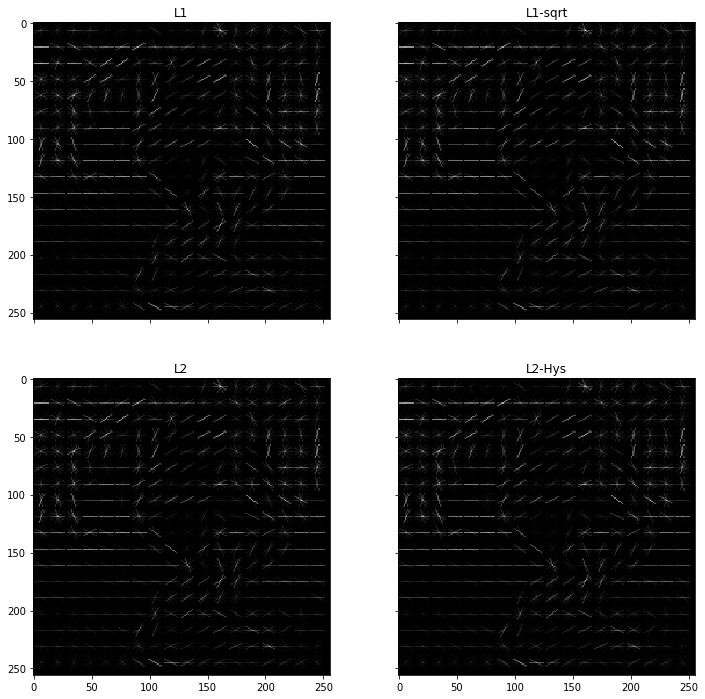

In [26]:
f, axarr = plt.subplots(2, 2, figsize=(12, 12))

axarr[0, 0].imshow(hog_image_rescaled_L1, cmap='gray')
axarr[0, 0].set_title('L1')

axarr[0, 1].imshow(hog_image_rescaled_L1_sqrt, cmap='gray')
axarr[0, 1].set_title('L1-sqrt')

axarr[1, 0].imshow(hog_image_rescaled_L2, cmap='gray')
axarr[1, 0].set_title('L2')

axarr[1, 1].imshow(hog_image_rescaled_L2_Hys, cmap='gray')
axarr[1, 1].set_title('L2-Hys')

for ax in axarr.flat:
    ax.label_outer()